# Noise levels

_28 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

This investigates the effect of noise on the CIFAR-10 simple model.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'batch_size':               ('expect', 64),
    'noise':                    ('series', '__all__'),
    'dataset':                  ('title',  'cifar10-simple-flipcrop'),
}

In [3]:
# These paths were before I added the pre/post-noise distinction in 423cbed
paths_old = ["results/20210826-cifar10-simple-noise-levels/"]
show_timestamp_info(paths_old)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **26 Aug 2021, 18:52:56** | 26 Aug 2021, 18:58:39 | 5 min 43 s |
| last to finish | 28 Aug 2021, 21:24:36 | **28 Aug 2021, 21:30:17** | 5 min 41 s |
| shortest | 27 Aug 2021, 16:59:21 | 27 Aug 2021, 17:04:45 | **5 min 24 s** |
| longest | 28 Aug 2021, 15:23:00 | 28 Aug 2021, 15:28:56 | **5 min 55 s** |


In [4]:
# These paths were after I added the pre/post-noise distinction in 423cbed
paths = ["results/20210831-noise-levels/"]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **29 Aug 2021, 01:21:51** | 29 Aug 2021, 01:28:19 | 6 min 28 s |
| last to finish | 01 Sep 2021, 12:48:02 | **01 Sep 2021, 13:16:51** | 28 min 48 s |
| shortest | 30 Aug 2021, 03:01:10 | 30 Aug 2021, 03:02:40 | **1 min 30 s** |
| longest | 30 Aug 2021, 22:49:40 | 30 Aug 2021, 23:23:09 | **33 min 28 s** |


# `dynpower`: Our analog scheme with dynamic power scaling

In [5]:
dynpower_specs = common_specs.copy()
dynpower_specs.update({
    'experiment': 'dynpower.py',
    'epochs':                   ('expect', 1),
    'clients':                  ('title',  20),
    'rounds':                   ('expect', 20),
    'ema_coefficient':          ('expect', 1 / 3),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'power_update_period':      ('expect', 1),
    'power_factor':             ('expect', 0.9),
    'power_quantile':           ('expect', 1.0),
    'parameter_radius_initial': ('expect', 1.0),
    'optimizer_client':         ('expect', 'sgd'),
    'lr_client':                ('expect', 0.001),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 0.0),
    'lr_scheduler_client':      ('expect', 'none'),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
    'client_sync':              ('expect', True),
})

- Matched 180 runs
- Skipping 810 runs using 2 other experiment classes: fednoise (540), addnoise.py (270)


/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


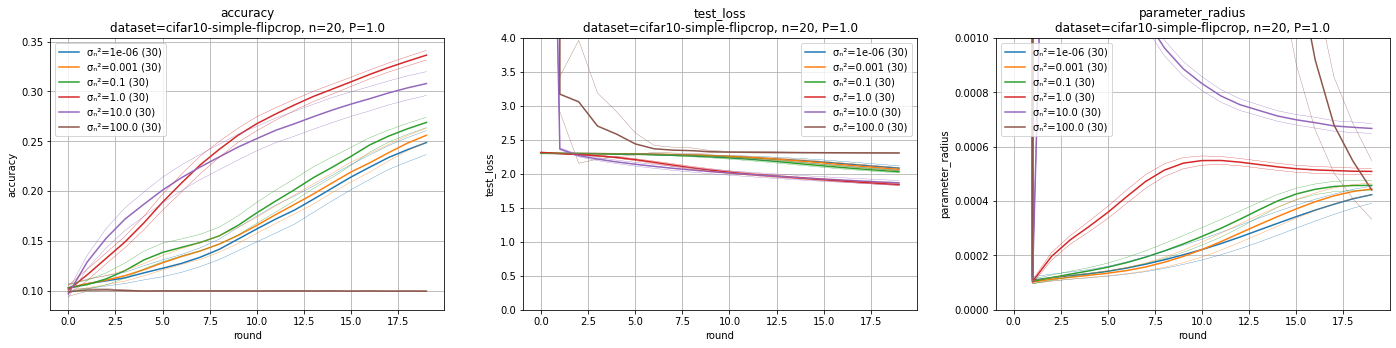

In [6]:
ylims = [None, (0, 4), (0, 0.001)]
plot_averaged_training_charts(paths_old, ['accuracy', 'test_loss', 'parameter_radius'], dynpower_specs, ylims=ylims, extra_lines=['confints'])

For longer, to confirm the effect:

- Matched 112 runs
- Skipping 1738 runs using 3 other experiment classes: addnoise (864), fednoise (720), overtheair (154)


/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/czlee/kyanite/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


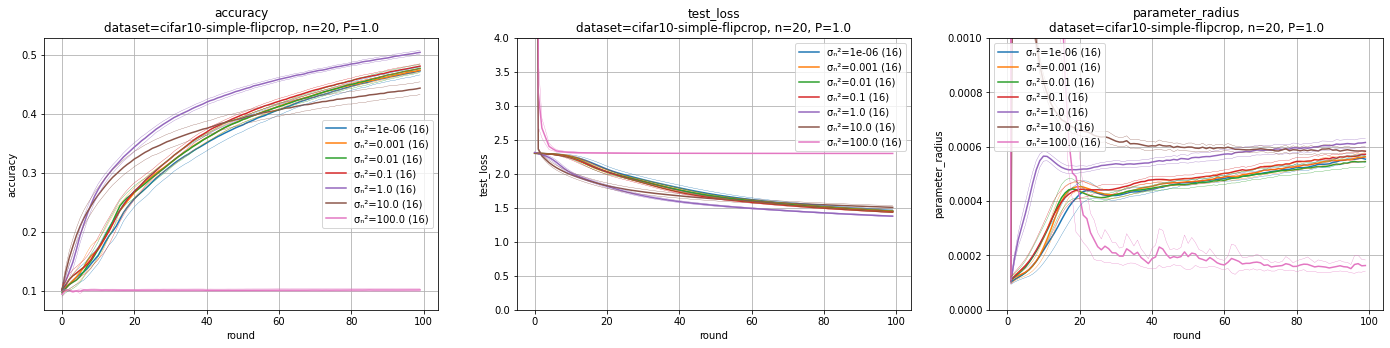

In [7]:
dynpower_specs['experiment'] = 'dynpower'
dynpower_specs['rounds'] = ('expect', 100)
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'parameter_radius'], dynpower_specs, ylims=ylims, extra_lines=['confints'])

# `addnoise`: Non-federated learning with noise added

There are also pretty much the same experiments in the `results/20210826-cifar10-simple-noise-levels` archive (in `20210826-185542` and `20210827-144908`), but they were before I added the pre/post-noise distinction in [`423cbed`](https://github.com/czlee/jadeite/commit/423cbed8c326792d184486987cc808e1b41c9ecf), so they're strictly less insightfult than these ones.

In [8]:
simple_specs = common_specs.copy()
simple_specs.update({
    'experiment': 'addnoise',
    'epochs':                   ('filter', 20),
    'optimizer':                ('expect', 'sgd'),
    'learning_rate':            ('expect', 0.001),
    'momentum':                 ('expect', 0.9),
    'weight_decay':             ('expect', 0.0),
    'lr_scheduler':             ('expect', 'none'),
    'num_examples':             ('filter', None, {'missing-treat-as': None}),
})

- Matched 240 runs
- Skipping 986 runs using 3 other experiment classes: fednoise (720), overtheair (154), dynpower (112)
- Skipping 624 runs that don't match on 2 keys: num_examples (624), epochs (144)


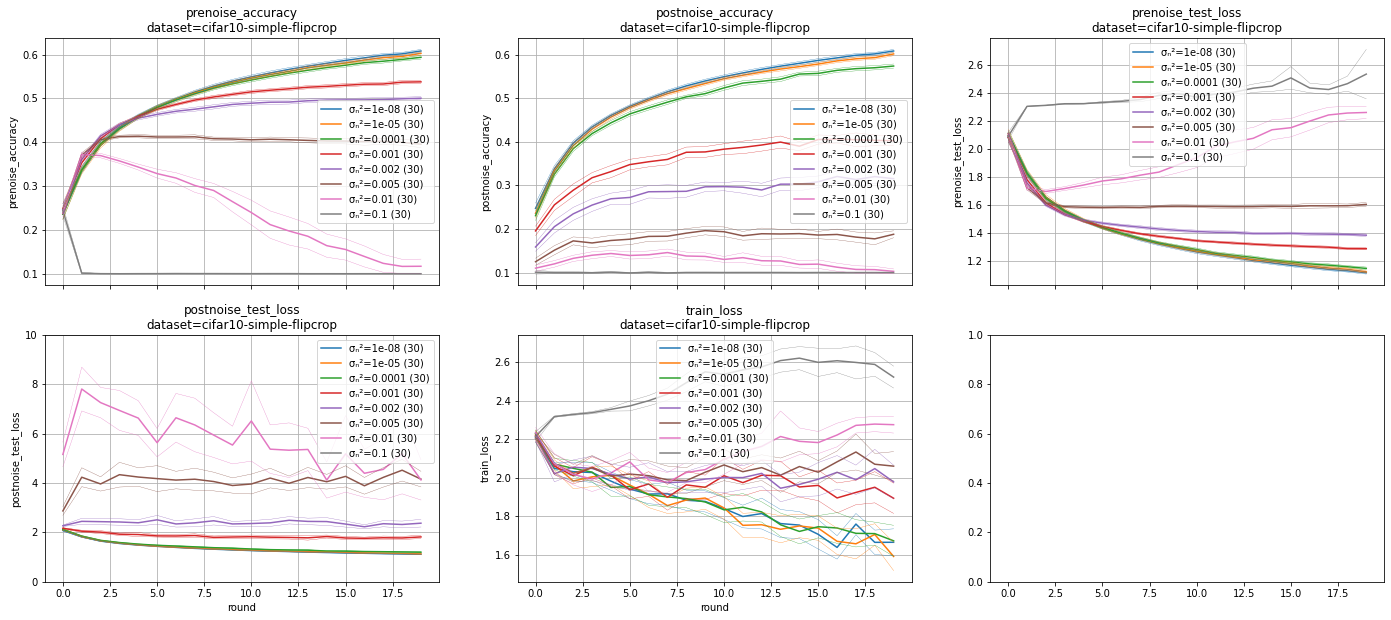

In [9]:
ylims = [None, None, None, (0, 10), None]
fields = ['prenoise_accuracy', 'postnoise_accuracy', 'prenoise_test_loss', 'postnoise_test_loss', 'train_loss']
plot_averaged_training_charts(paths, fields, simple_specs, ylims=ylims, extra_lines=['confints'])

# `fednoise`: Unconstrained federated averaging with noise added

In [10]:
fednoise_specs = common_specs.copy()
fednoise_specs.update({
    'experiment': 'fednoise',
    'epochs':                   ('expect', 1),
    'clients':                  ('title',  20),
    'rounds':                   ('expect', 20),
    'save_squared_error':       ('expect', False),
    'send':                     ('filter',  'deltas'),
    'optimizer_client':         ('expect', 'sgd'),
    'lr_client':                ('expect', 0.001),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 0.0),
    'lr_scheduler_client':      ('expect', 'none'),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
    'client_sync':              ('expect', True),
})

- Matched 240 runs
- Skipping 1130 runs using 3 other experiment classes: addnoise (864), overtheair (154), dynpower (112)
- Skipping 480 runs that don't match on 2 keys: send (240), clients (240)


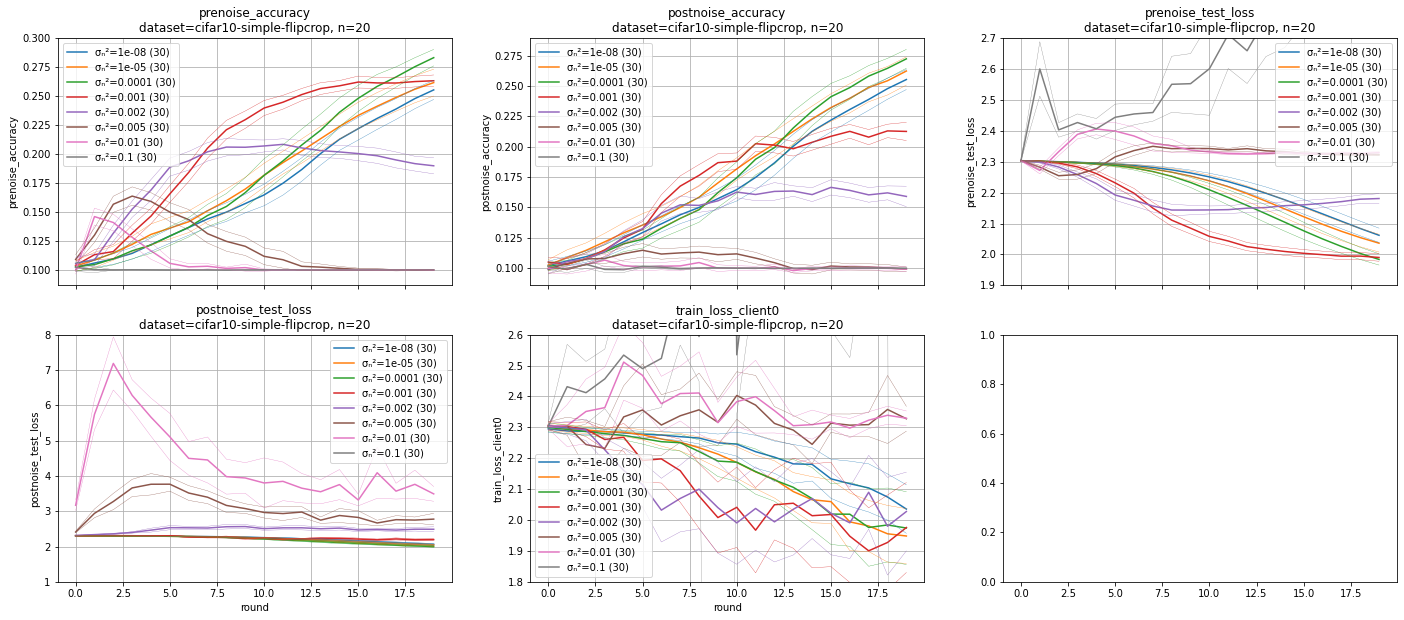

In [11]:
ylims = [None, None, (1.9, 2.7), (1, 8), (1.8, 2.6)]
fields = ['prenoise_accuracy', 'postnoise_accuracy', 'prenoise_test_loss', 'postnoise_test_loss', 'train_loss_client0']
plot_averaged_training_charts(paths, fields, fednoise_specs, ylims=ylims, extra_lines=['confints'])

- Matched 240 runs
- Skipping 1130 runs using 3 other experiment classes: addnoise (864), overtheair (154), dynpower (112)
- Skipping 480 runs that don't match on 2 keys: clients (480), send (240)


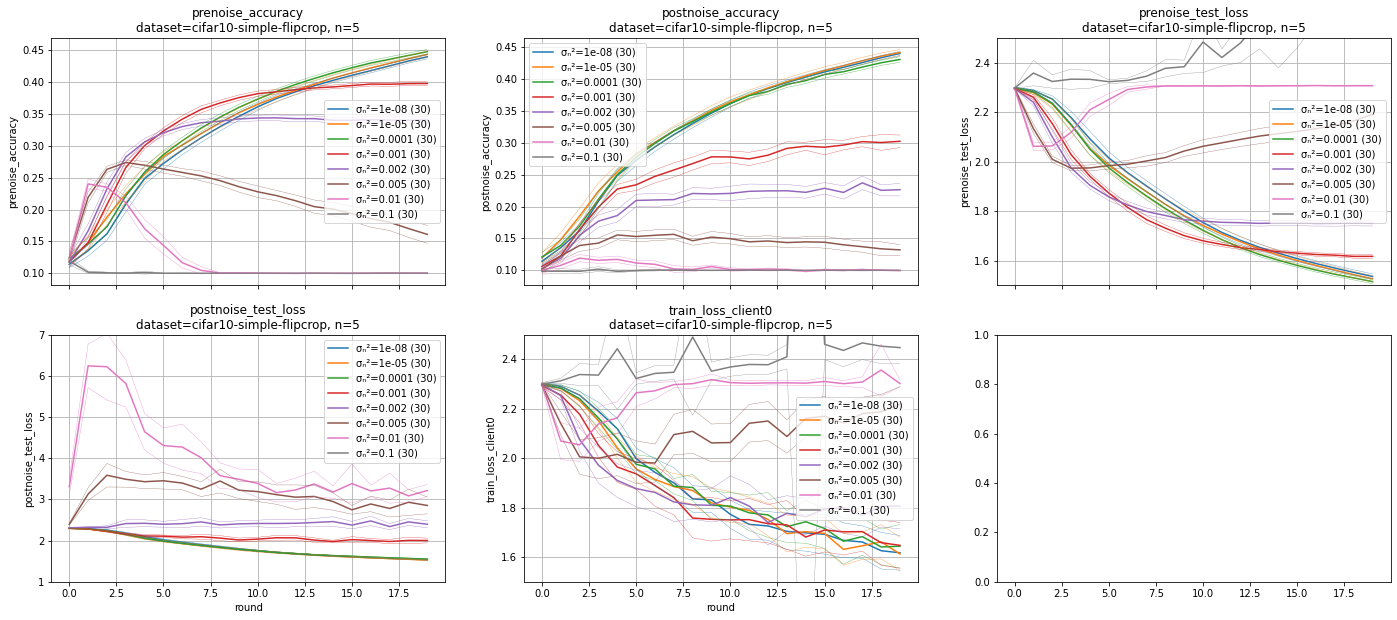

In [12]:
ylims = [None, None, (1.5, 2.5), (1, 7), (1.5, 2.5)]
fednoise_specs['clients'] = ('title', 5)
plot_averaged_training_charts(paths, fields, fednoise_specs, ylims=ylims, extra_lines=['confints'])

## with `send=params`

This is a sanity check for the above plots, they should be the same despite the different method.

- Matched 240 runs
- Skipping 1130 runs using 3 other experiment classes: addnoise (864), overtheair (154), dynpower (112)
- Skipping 480 runs that don't match on 2 keys: send (480), clients (240)


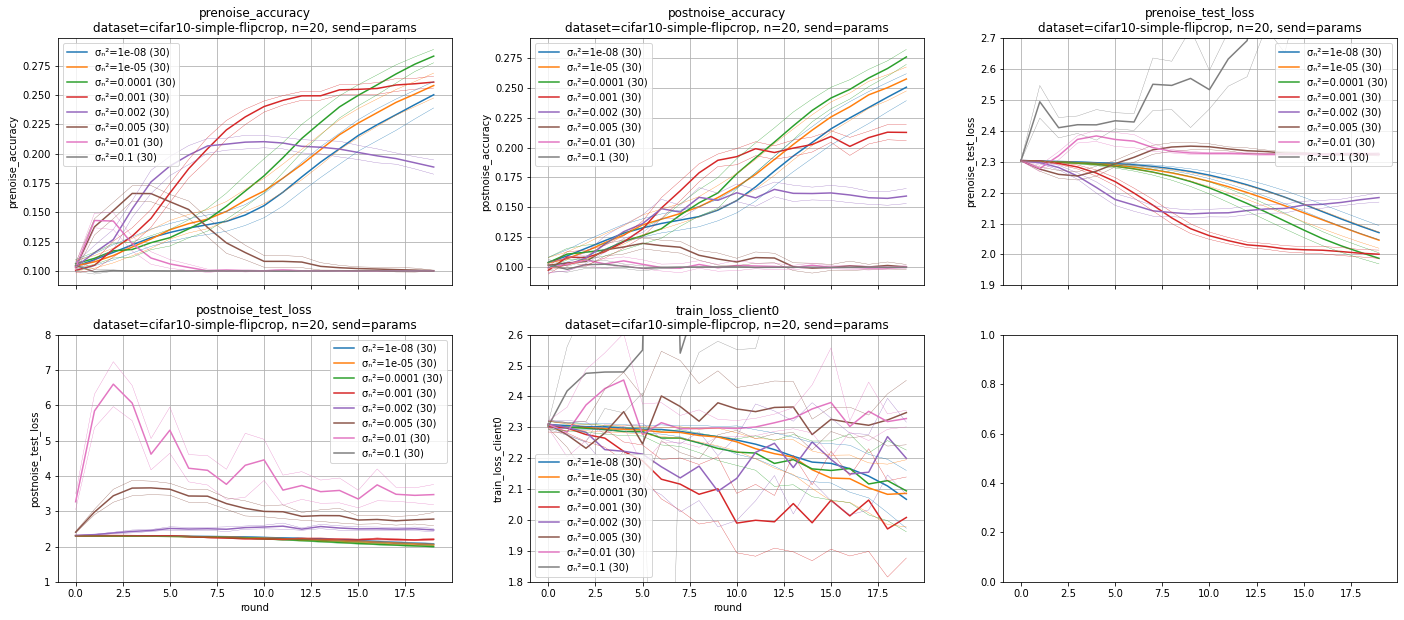

In [13]:
fednoise_specs['send'] = ('title', 'params')
fednoise_specs['clients'] = ('title', 20)
ylims = [None, None, (1.9, 2.7), (1, 8), (1.8, 2.6)]
fields = ['prenoise_accuracy', 'postnoise_accuracy', 'prenoise_test_loss', 'postnoise_test_loss', 'train_loss_client0']
plot_averaged_training_charts(paths, fields, fednoise_specs, ylims=ylims, extra_lines=['confints'])

Yeah, pretty much.

# `addnoise`: Non-federated learning with reduced datasets

The earlier non-federated learning plots weren't nearly as drastic as the above federated ones. Is this because of the size of the dataset?

- Matched 240 runs
- Skipping 986 runs using 3 other experiment classes: fednoise (720), overtheair (154), dynpower (112)
- Skipping 624 runs that don't match on 2 keys: num_examples (480), epochs (144)


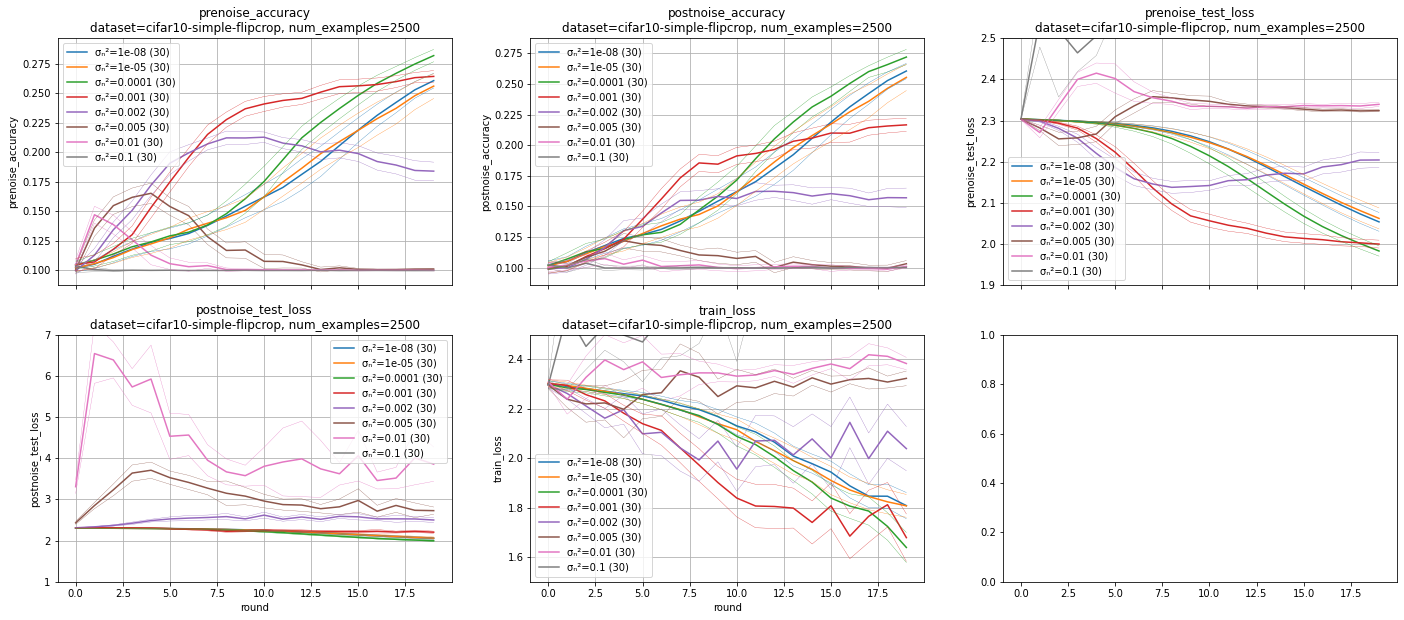

In [14]:
simple_specs['num_examples'] = ('title', 2500, {'missing-treat-as': None})
ylims = [None, None, (1.9, 2.5), (1, 7), (1.5, 2.5)]
fields = ['prenoise_accuracy', 'postnoise_accuracy', 'prenoise_test_loss', 'postnoise_test_loss', 'train_loss']
plot_averaged_training_charts(paths, fields, simple_specs, ylims=ylims, extra_lines=['confints'])

- Matched 240 runs
- Skipping 986 runs using 3 other experiment classes: fednoise (720), overtheair (154), dynpower (112)
- Skipping 624 runs that don't match on 2 keys: num_examples (624), epochs (144)


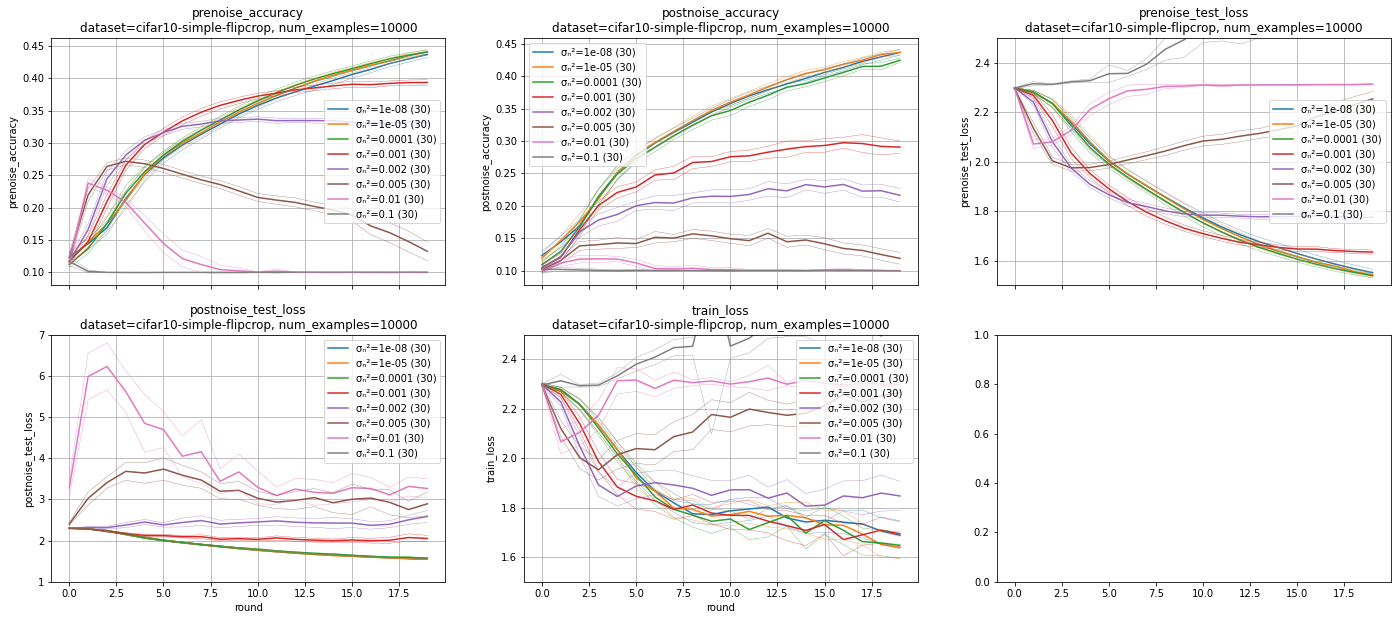

In [15]:
simple_specs['num_examples'] = ('title', 10000, {'missing-treat-as': None})
ylims = [None, None, (1.5, 2.5), (1, 7), (1.5, 2.5)]
fields = ['prenoise_accuracy', 'postnoise_accuracy', 'prenoise_test_loss', 'postnoise_test_loss', 'train_loss']
plot_averaged_training_charts(paths, fields, simple_specs, ylims=ylims, extra_lines=['confints'])

- Matched 144 runs
- Skipping 986 runs using 3 other experiment classes: fednoise (720), overtheair (154), dynpower (112)
- Skipping 720 runs that don't match on 2 keys: epochs (720), num_examples (480)


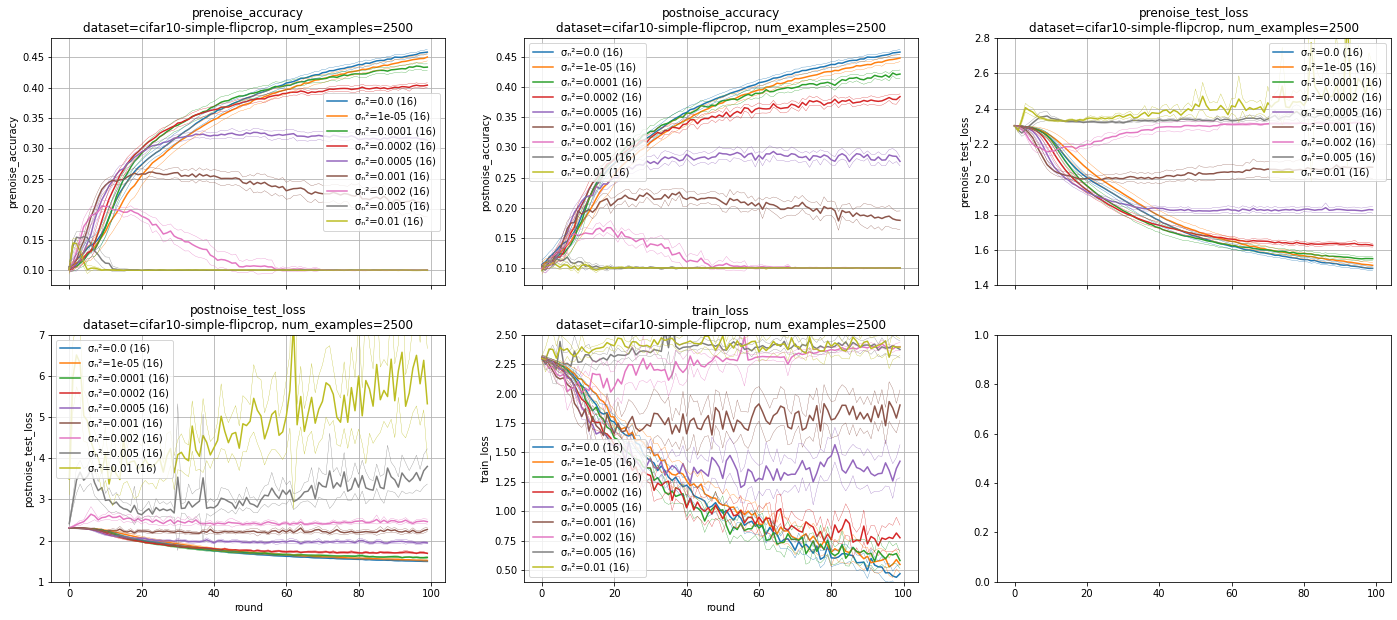

In [16]:
simple_specs['num_examples'] = ('title', 2500, {'missing-treat-as': None})
simple_specs['epochs'] = ('filter', 100)
ylims = [None, None, (1.4, 2.8), (1, 7), (0.4, 2.5)]
fields = ['prenoise_accuracy', 'postnoise_accuracy', 'prenoise_test_loss', 'postnoise_test_loss', 'train_loss']
plot_averaged_training_charts(paths, fields, simple_specs, ylims=ylims, extra_lines=['confints'])

# `overtheair`: Analog scheme with fixed parameter radius

In [17]:
overtheair_specs = common_specs.copy()
overtheair_specs.update({
    'experiment': 'overtheair',
    'epochs':                   ('expect', 1),
    'clients':                  ('title',  20),
    'rounds':                   ('expect', 100),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'parameter_radius':         ('title',  0.006),
    'optimizer_client':         ('expect', 'sgd'),
    'lr_client':                ('expect', 0.001),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 0.0),
    'lr_scheduler_client':      ('expect', 'none'),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
    'client_sync':              ('expect', True),
})

- Matched 154 runs
- Skipping 1696 runs using 3 other experiment classes: addnoise (864), fednoise (720), dynpower (112)


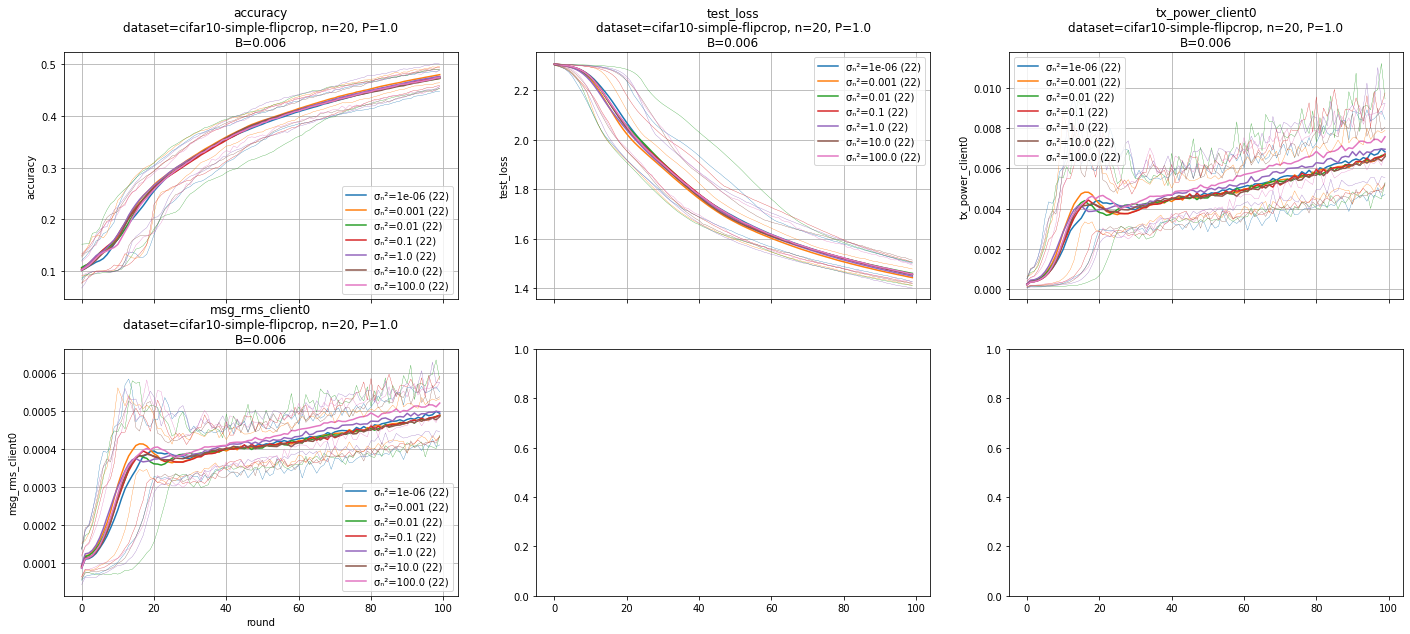

In [18]:
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'tx_power_client0', 'msg_rms_client0'], overtheair_specs, extra_lines=['range'])

## Sanity check that the noise is actually working

These were run on [`dcdd0fa`](https://github.com/czlee/jadeite/commit/dcdd0fa802cc65328f8c3677f683ceab5a93c601), which logs the "rx power" (which should be total tx power plus noise). Basically at high noise levels this should be really high. Seems to be working fine, so there's no bug there, but interestingly noise still seems to have virtually no impact on training.

- Matched 8 runs


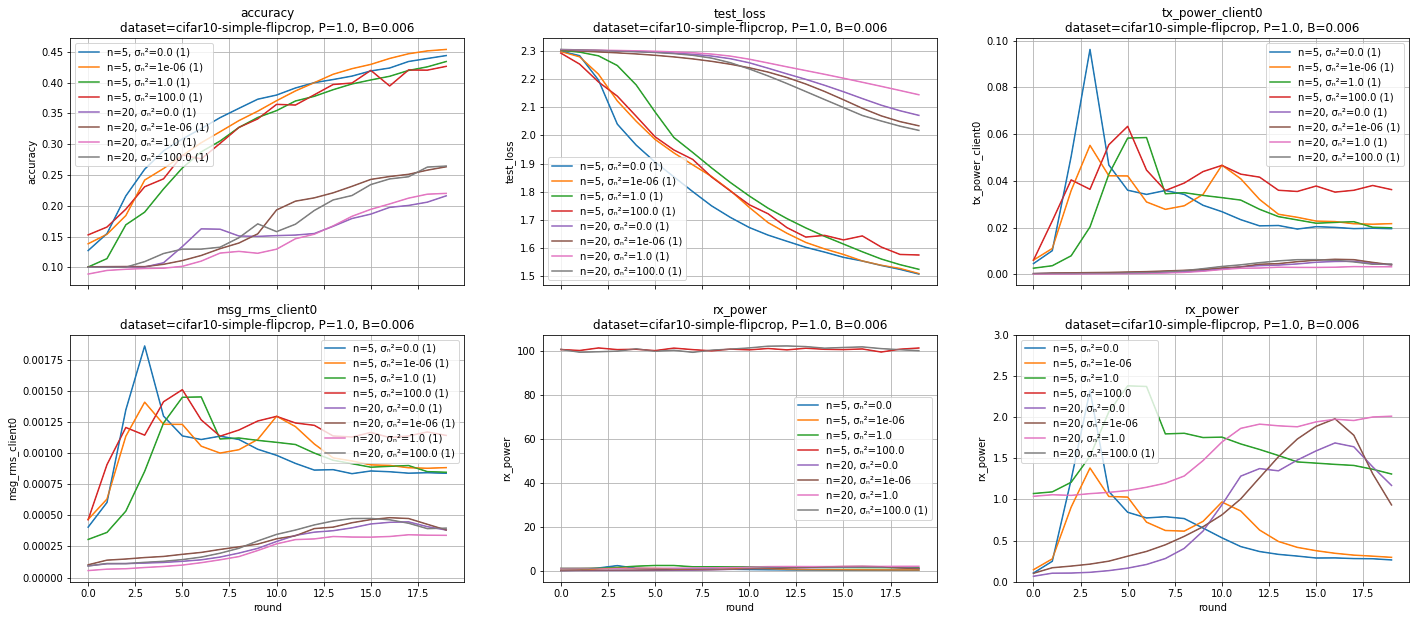

In [19]:
rxpowercheck_specs = overtheair_specs.copy()
rxpowercheck_specs['rounds'] = ('expect', 20)
rxpowercheck_specs['clients'] = ('series', '__all__')
del rxpowercheck_specs['noise'] # reorder series
rxpowercheck_specs['noise'] = ('series', '__all__')
ylims = [None, None, None, None, None, (0, 3)]
plot_averaged_training_charts(["results/20210901-rx-power-check/"], 
                              ['accuracy', 'test_loss', 'tx_power_client0', 'msg_rms_client0', 'rx_power', 'rx_power'], 
                              rxpowercheck_specs, ylims=ylims, extra_lines=['range'])